# Data Analysis and Visualizations for Energy Consumption
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zqhjfFamcaAe-q3YUIMf1948tJtN4xup#scrollTo=kCE_C2OdhD1q)  
*BUS5PR1 - Sprint 01*  
by Duc Dao

## **Step 1: Data Exploration**
  

### **Import datasets**

In [ ]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split

In [ ]:
# Load data
# df_acc = pd.read_csv('building_type_accommodation.csv')
# df_hyb = pd.read_csv('building_type_hybrid.csv')
# df_tea = pd.read_csv('building_type_teaching.csv')
# df = df_acc.append([df_hyb, df_tea], ignore_index=True)

# Define function
# def building_type (row):
#   if row['MeterKey'] == 707 :
#      return 'Accommodation'
#   if row['MeterKey'] == 703 :
#      return 'Hybrid'
#   if row['MeterKey'] == 698:
#      return 'Teaching'

# combine datasets using lambda function
# df['building_type'] = df.apply (lambda row: building_type(row), axis=1)
# df.head(1)

,Timestamp,MeterKey,MeterReading,Day,Weekday,IsWeekend,IsHoliday,WeekOfMonth,WeekOfYear,Month,Quarter,Hour24,Hour12ShortString,AmPmCode,Minute,HalfHour,FullTimeString24,ApparentTemperature,RelativeHumidity,CDD,HDD,building_type
0,2018-01-01 00:15:00,707,4.672,1,2,0,1,1,1,1,1,0,0,AM,15,0,00:15:00,16.0,86.0,0.697895,0.893684,Accommodation


In [ ]:
# import the datasets
df_accommodation = pd.read_csv('building_type_accommodation.csv')
df_hybrid = pd.read_csv('building_type_hybrid.csv')
df_teaching = pd.read_csv('building_type_teaching.csv')

# Quick view the datasets 
print(df_accommodation.head(1))
print(df_hybrid.head(1))
print(df_teaching.head(1))

# Shape of all datasets
print(df_accommodation.shape)
print(df_hybrid.shape)
print(df_teaching.shape)

             Timestamp  MeterKey  ...       CDD       HDD
0  2018-01-01 00:15:00       707  ...  0.697895  0.893684

[1 rows x 21 columns]
             Timestamp  MeterKey  ...       CDD       HDD
0  2018-01-01 00:15:00       703  ...  0.697895  0.893684

[1 rows x 21 columns]
             Timestamp  MeterKey  ...       CDD       HDD
0  2018-01-01 00:15:00       698  ...  0.613889  0.786111

[1 rows x 21 columns]
(34996, 21)
(35005, 21)
(34972, 21)


There is no insificant imbalance between the datasets

In [ ]:
# Insert building type col & combine data
df_accommodation.insert(1, 'BuildingType', 'Accommodation')
df_hybrid.insert(1, 'BuildingType', 'Hybrid')
df_teaching.insert(1, 'BuildingType', 'Teaching')
df = df_accommodation.append([df_hybrid, df_teaching], ignore_index=True)

# View the dataset
df.head(1)

,Timestamp,BuildingType,MeterKey,MeterReading,Day,Weekday,IsWeekend,IsHoliday,WeekOfMonth,WeekOfYear,Month,Quarter,Hour24,Hour12ShortString,AmPmCode,Minute,HalfHour,FullTimeString24,ApparentTemperature,RelativeHumidity,CDD,HDD
0,2018-01-01 00:15:00,Accommodation,707,4.672,1,2,0,1,1,1,1,1,0,0,AM,15,0,00:15:00,16.0,86.0,0.697895,0.893684


In [ ]:
# Data description
print("="*50)
print("First Two Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values ","\n")
print(df.isnull().sum(),"\n")

First Two Rows  

             Timestamp   BuildingType  ...       CDD       HDD
0  2018-01-01 00:15:00  Accommodation  ...  0.697895  0.893684
1  2018-01-01 00:30:00  Accommodation  ...  0.697895  0.893684

[2 rows x 22 columns] 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104973 entries, 0 to 104972
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Timestamp            104973 non-null  object 
 1   BuildingType         104973 non-null  object 
 2   MeterKey             104973 non-null  int64  
 3   MeterReading         104973 non-null  float64
 4   Day                  104973 non-null  int64  
 5   Weekday              104973 non-null  int64  
 6   IsWeekend            104973 non-null  int64  
 7   IsHoliday            104973 non-null  int64  
 8   WeekOfMonth          104973 non-null  int64  
 9   WeekOfYear           104973 non-null  int64  
 10  Month       

The dataset has no missing value

### **Extract date from data**


In [ ]:
# create Date col
df['Timestamp']=  pd.to_datetime(df['Timestamp'])
df['Date']=  pd.to_datetime(df['Timestamp'],format='%Y%m%d').dt.date
df.dtypes

Timestamp              datetime64[ns]
BuildingType                   object
MeterKey                        int64
MeterReading                  float64
Day                             int64
Weekday                         int64
IsWeekend                       int64
IsHoliday                       int64
WeekOfMonth                     int64
WeekOfYear                      int64
Month                           int64
Quarter                         int64
Hour24                          int64
Hour12ShortString               int64
AmPmCode                       object
Minute                          int64
HalfHour                        int64
FullTimeString24               object
ApparentTemperature           float64
RelativeHumidity              float64
CDD                           float64
HDD                           float64
Date                           object
dtype: object

### Export file

In [ ]:
# Export file
from google.colab import files
df.to_csv('Buildings_energy_consumption.csv') 
files.download('Buildings_energy_consumption.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Step 2: Data Exploration**  
*descriptive analytics*

###**Which type of building consume more power?**

In [ ]:
# Group and sort the total energy consumption by building type
df.groupby('BuildingType', as_index = False)[['MeterReading']].sum().sort_values(['MeterReading'],ascending=False)

,BuildingType,MeterReading
1,Hybrid,992127.734
2,Teaching,470455.016
0,Accommodation,142676.500


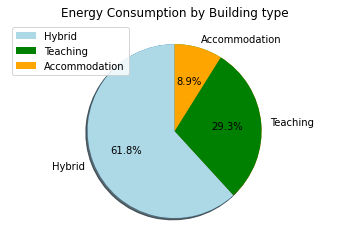

In [ ]:
# plot buiding types consumption percentage
df_prc = df.groupby('BuildingType', as_index = False)[['MeterReading']].sum().sort_values(['MeterReading'],ascending=False)
colors = ['lightblue', 'green', 'orange']

fig1, ax1 = plt.subplots()
ax1.pie(df_prc.MeterReading, labels=df_prc.BuildingType, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
patches, texts = plt.pie(df_prc.MeterReading, colors=colors, shadow=True, startangle=90)
plt.legend(patches, df_prc.BuildingType, loc="best")
plt.title('Energy Consumption by Building type')
plt.show()

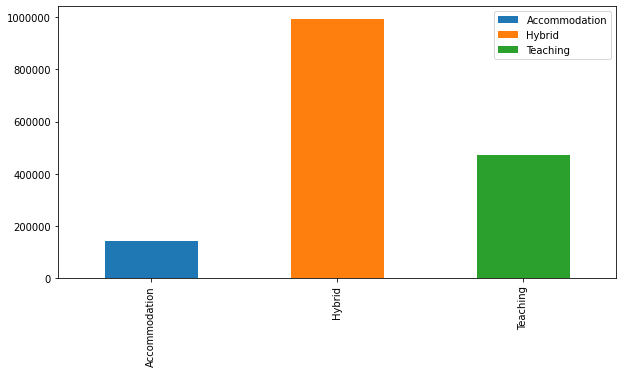

In [ ]:
# Function to create a column chart with respect to outcome feature. 
def bar_chart(dataframe, feature):
    Accommodation = dataframe[dataframe['BuildingType']=='Accommodation'].groupby(feature)['MeterReading'].sum()
    Hybrid = dataframe[dataframe['BuildingType']=='Hybrid'].groupby(feature)['MeterReading'].sum()
    Teaching = dataframe[dataframe['BuildingType']=='Teaching'].groupby(feature)['MeterReading'].sum()
    df = pd.DataFrame([Accommodation, Hybrid, Teaching])
    df.index = ['Accommodation','Hybrid','Teaching' ]
    axes_m = df.plot(kind='bar',stacked=True, figsize=(10,5))
    axes_m.ticklabel_format(axis='y', style='plain') 

bar_chart(df, 'BuildingType')

Hybrid buildings use the most electricity which equal to **62% of total energy consumption**, followed by Teaching buildings (29%). Whereas, accommodation buildings consume lowest power at 8%

## **Consumption patterns**

### **Energy usage during different seasons of the year**

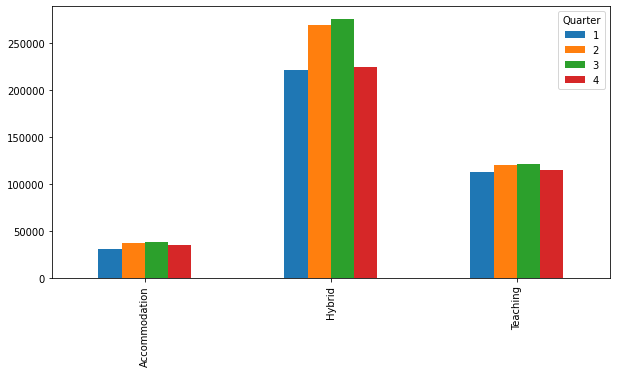

In [ ]:
# plot consumption by building type and quarter
# Function to create a column chart with respect to outcome feature. 
def bar_chart(dataframe, feature):
    Accommodation = dataframe[dataframe['BuildingType']=='Accommodation'].groupby(feature)['MeterReading'].sum()
    Hybrid = dataframe[dataframe['BuildingType']=='Hybrid'].groupby(feature)['MeterReading'].sum()
    Teaching = dataframe[dataframe['BuildingType']=='Teaching'].groupby(feature)['MeterReading'].sum()
    df = pd.DataFrame([Accommodation, Hybrid, Teaching])
    df.index = ['Accommodation','Hybrid','Teaching' ]
    axes_m = df.plot(kind='bar',stacked=False, figsize=(10,5))
    axes_m.ticklabel_format(axis='y', style='plain')
bar_chart(df, 'Quarter')

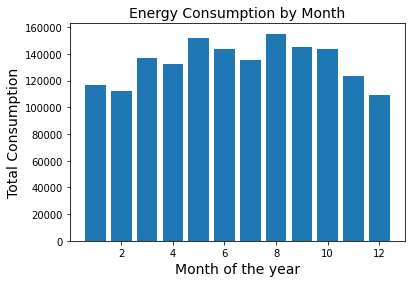

In [ ]:
# plot energy consumption by month
df_monthly = df.groupby(['Quarter', 'Month'], as_index = False)[['MeterReading']].sum()
plt.bar(df_monthly['Month'], df_monthly['MeterReading'])
plt.title('Energy Consumption by Month', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)
plt.ylabel('Total Consumption', fontsize=14)
plt.grid(False)
plt.show()

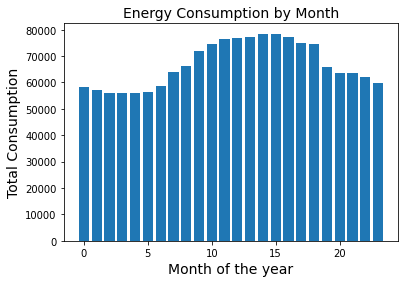

In [ ]:
# plot energy consumption by hour
df_hour24 = df.groupby('Hour24', as_index = False)[['MeterReading']].sum()
plt.bar(df_hour24['Hour24'], df_hour24['MeterReading'])
plt.title('Energy Consumption by Month', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)
plt.ylabel('Total Consumption', fontsize=14)
plt.grid(False)
plt.show()

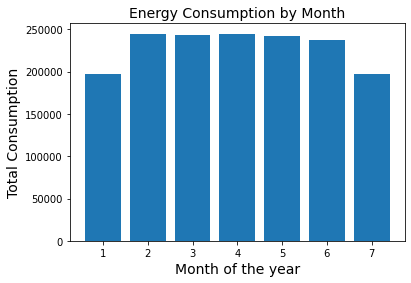

In [ ]:
# plot energy consumption by day
df_weekday = df.groupby('Weekday', as_index = False)[['MeterReading']].sum()
plt.bar(df_weekday['Weekday'], df_weekday['MeterReading'])
plt.title('Energy Consumption by Month', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)
plt.ylabel('Total Consumption', fontsize=14)
plt.grid(False)
plt.show()

### **Consumption over time**

**Hour pattern**: It can be seen that during the day, the consumption from 8am to 6pm is higher than average, because of the class start from 8am and most of the class will end at 6pm.   
However, during the week, there is noticeable that the con consumption on Monday and Sun is lower than other days, thus further analysis need to be done to identify weekly consumption pattern.   
Energy consumption during winter months (May to October) is higher than summer time. One of the reason might be because of more energy for warming up the buildings

In [ ]:
df_hour = df.groupby(['Hour24','Date'], as_index = False).agg(TotalConsumption=('MeterReading','sum'), 
                                         AvgTemperature=('ApparentTemperature','mean'),
                                         AvgHumidity=('RelativeHumidity','mean'),
                                         AvgCDD=('CDD','mean'),
                                         AvgHDD=('HDD','mean'),
                                         Day=('Day','median'),
                                         Weekday=('Weekday','median'),
                                         IsWeekend=('IsWeekend','median'),
                                         IsHoliday=('IsHoliday','median'),
                                         Month=('Month','median'),
                                         Quarter=('Quarter','median'))

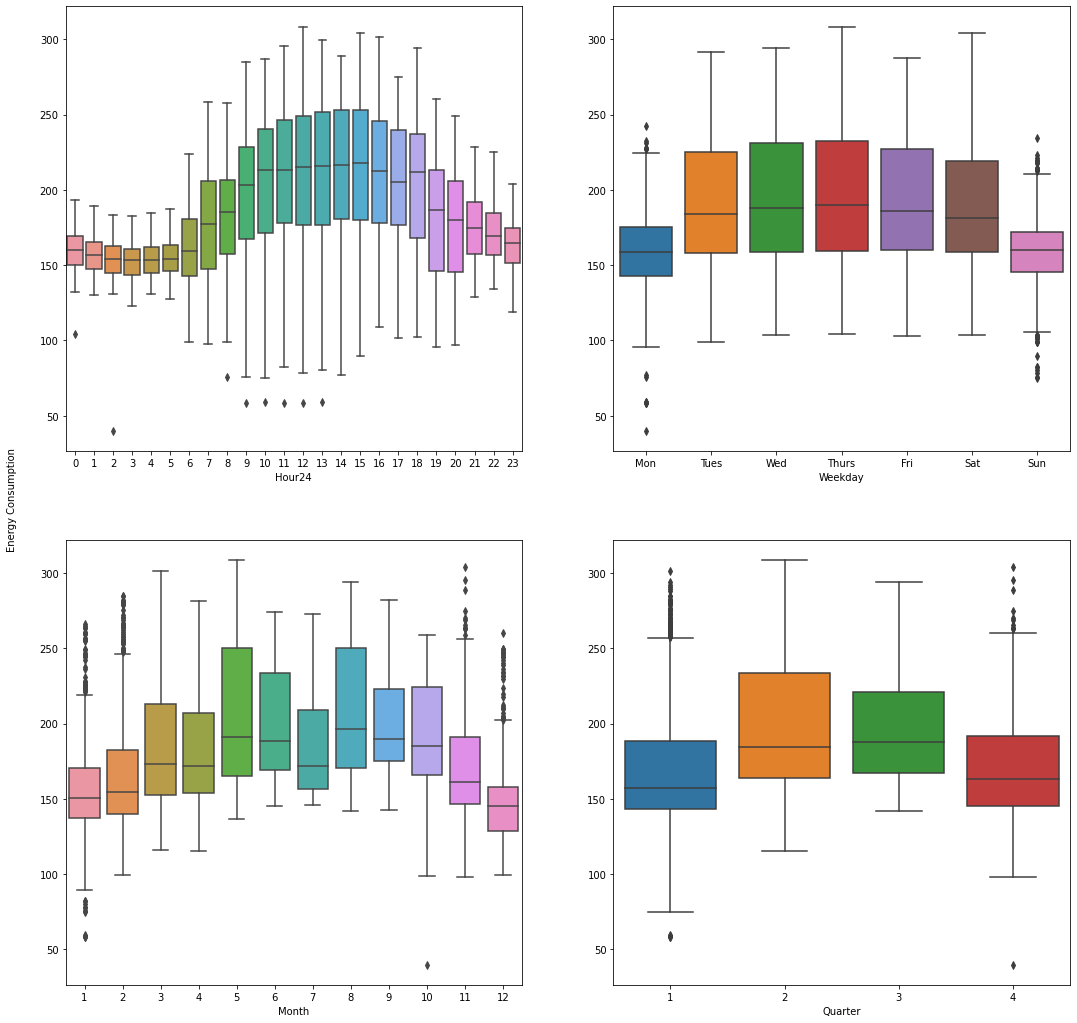

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18,18))

# Hour of Day
g = sns.boxplot(x=df_hour['Hour24'], y=df_hour['TotalConsumption'], ax=axes[0][0])
g.set_ylabel('')

# Day of Week
dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
g = sns.boxplot(x=df_hour['Weekday'], y=df_hour['TotalConsumption'], ax=axes[0][1])
g.set_xticklabels(dow_labels)
g.set_ylabel('')

# Month of Year
g = sns.boxplot(x=df_hour['Month'], y=df_hour['TotalConsumption'], ax=axes[1][0])
g.set_ylabel('')

# Quarter
g = sns.boxplot(x=df_hour['Quarter'], y=df_hour['TotalConsumption'], ax=axes[1][1])
g.set_ylabel('')
fig.text(0.08, 0.5, 'Energy Consumption', va='center', rotation='vertical')
#plt.savefig('images/boxplots.png')
plt.show()

In [ ]:
cor_matrix = df_hour.corr()
cor_matrix

,Hour24,TotalConsumption,AvgTemperature,AvgHumidity,AvgCDD,AvgHDD,Day,Weekday,IsWeekend,IsHoliday,Month,Quarter
Hour24,1.000000,0.249087,0.201455,-0.317279,0.000008,0.000013,0.000025,0.000037,-0.000039,0.000008,-0.000025,-0.000033
TotalConsumption,0.249087,1.000000,-0.054577,-0.269043,-0.142955,0.288774,0.015983,-0.012913,-0.392064,-0.081627,0.015950,0.007605
AvgTemperature,0.201455,-0.054577,1.000000,-0.547712,0.662340,-0.833734,-0.034440,0.025476,-0.026601,0.094722,-0.230795,-0.226082
AvgHumidity,-0.317279,-0.269043,-0.547712,1.000000,-0.234773,0.238968,0.066740,0.007695,0.054157,0.025325,0.060243,0.049929
AvgCDD,0.000008,-0.142955,0.662340,-0.234773,1.000000,-0.537140,0.039943,0.101962,-0.002784,0.066624,-0.240848,-0.237433
AvgHDD,0.000013,0.288774,-0.833734,0.238968,-0.537140,1.000000,0.069987,0.010877,0.042978,-0.112164,0.235443,0.228905
Day,0.000025,0.015983,-0.034440,0.066740,0.039943,0.069987,1.000000,0.004728,-0.009439,0.105528,0.012009,0.013813
Weekday,0.000037,-0.012913,0.025476,0.007695,0.101962,0.010877,0.004728,1.000000,0.002001,-0.051029,-0.000204,-0.010791
IsWeekend,-0.000039,-0.392064,-0.026601,0.054157,-0.002784,0.042978,-0.009439,0.002001,1.000000,-0.160511,0.012659,0.005210
IsHoliday,0.000008,-0.081627,0.094722,0.025325,0.066624,-0.112164,0.105528,-0.051029,-0.160511,1.000000,0.128858,0.098597


### **Relationship with weather conditions**  
Energy and Weather Information at Day Level

In [ ]:
# daily energy consumption and weather information on average 
df_daily = df.groupby('Date', as_index = False).agg(TotalConsumption=('MeterReading','sum'), 
                                         AvgTemperature=('ApparentTemperature','mean'),
                                         AvgHumidity=('RelativeHumidity','mean'),
                                         AvgCDD=('CDD','mean'),
                                         AvgHDD=('HDD','mean'))
df_daily.head(5)

,Date,TotalConsumption,AvgTemperature,AvgHumidity,AvgCDD,AvgHDD
0,2018-01-01,3222.005,18.509474,67.673684,0.669893,0.857827
1,2018-01-02,3719.068,16.657292,61.822917,0.035526,1.562171
2,2018-01-03,3567.450,15.490625,66.197917,0.000000,2.617374
3,2018-01-04,3778.193,17.267708,66.291667,0.707087,2.092860
4,2018-01-05,3679.152,21.919792,60.114583,3.585280,0.985852


**Energy consumption over time**  
It is noticeable that the energy consumption is lower than average from the end of December to February and July due to school holiday.  
However, the energy consumption in July is higher than summer school holiday may be because of the weather *(more power consumption to heat up the building in the winter than cooling the building in the summer)*.

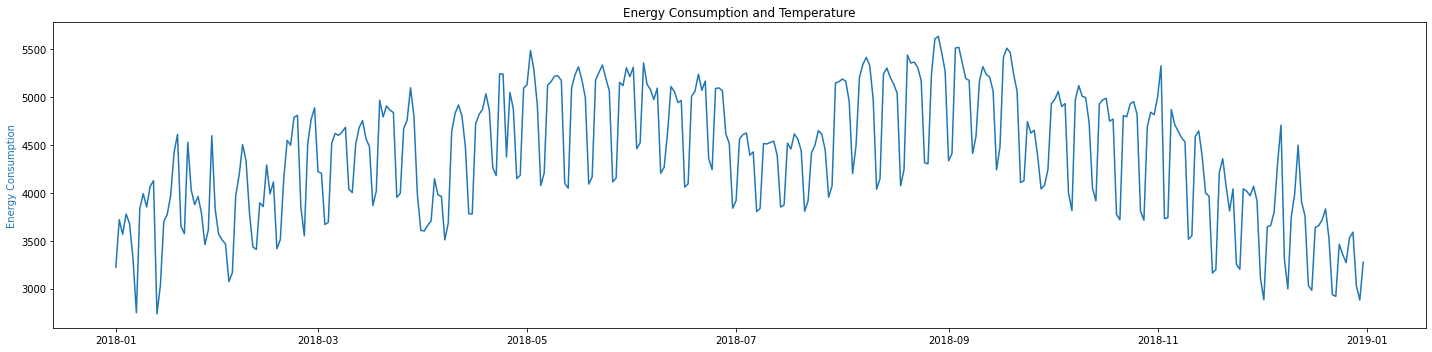

In [ ]:
# Energy consumption over time
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(df_daily.Date,df_daily.TotalConsumption,color = 'tab:blue')
ax1.set_ylabel('Energy Consumption',color = 'tab:blue')

plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

**1. Temperature**

We can see that energy and temperature have an inverse relationship. During low temperature, the higher energy consumption through heaters increases


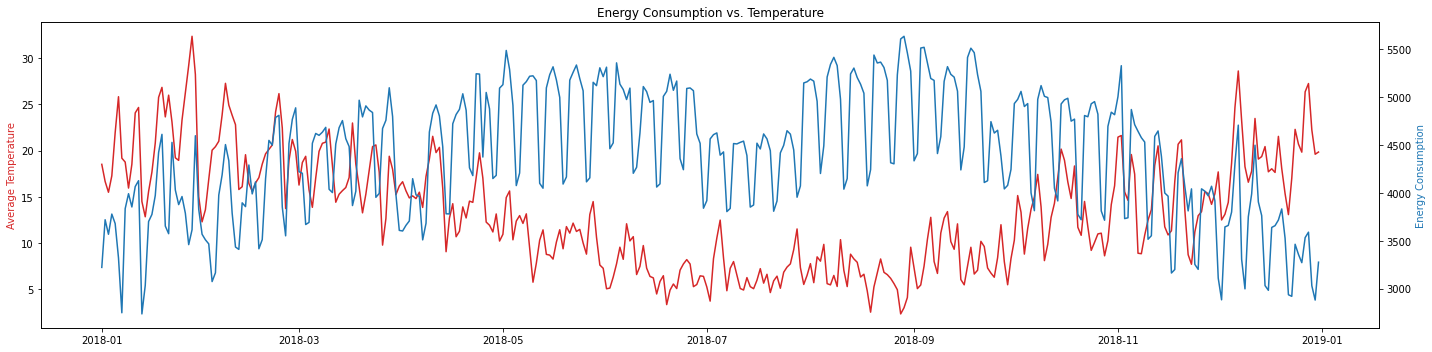

In [ ]:
# Energy consumption vs temperature
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(df_daily.Date, df_daily.AvgTemperature, color = 'tab:red')
ax1.set_ylabel('Average Temperature', color = 'tab:red')
ax2 = ax1.twinx()
ax2.plot(df_daily.Date,df_daily.TotalConsumption,color = 'tab:blue')
ax2.set_ylabel('Energy Consumption',color = 'tab:blue')

plt.title('Energy Consumption vs. Temperature')
fig.tight_layout()
plt.show()

**2. Humidity**

Average humidity and the consumption of energy seems to have the same trend.

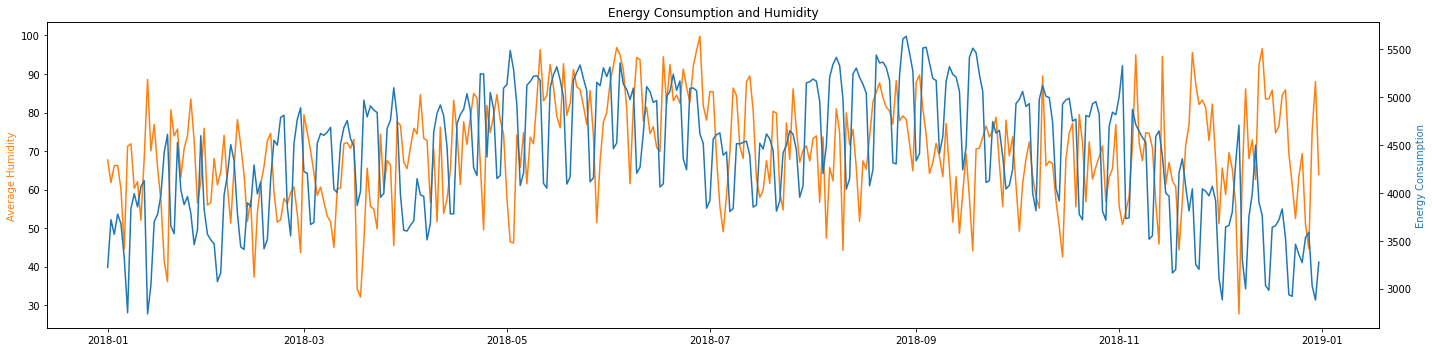

In [ ]:
# Energy consumption vs humidity
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(df_daily.Date, df_daily.AvgHumidity, color = 'tab:orange')
ax1.set_ylabel('Average Humidity', color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(df_daily.Date,df_daily.TotalConsumption,color = 'tab:blue')
ax2.set_ylabel('Energy Consumption',color = 'tab:blue')

plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

**3. Degree days** *(CDD and HDD)*

CDD and HDD are the measure of how much and for how long outside air temperature was higher/lower than balance temperature.  
Overall, there is an inverse relationship between energy consumption and CDD but strong relationship with HDD because Melbourne's typical weather range from 6 to 26°C. Therefore, there is more energy consumption on heating system than cooling system, especially on winter (July to October)

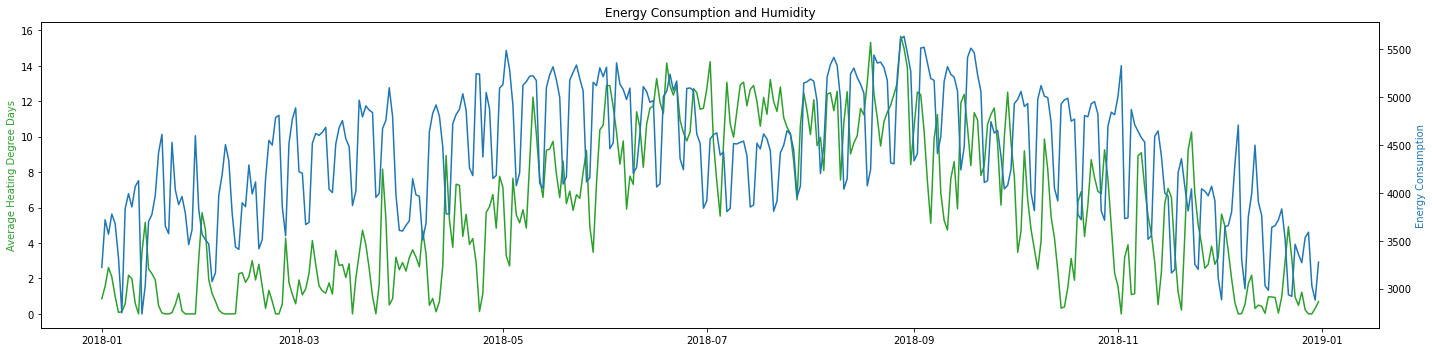

In [ ]:
# Energy consumption vs HDD
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(df_daily.Date, df_daily.AvgHDD, color = 'tab:green')
ax1.set_ylabel('Average Heating Degree Days', color = 'tab:green')
ax2 = ax1.twinx()
ax2.plot(df_daily.Date,df_daily.TotalConsumption,color = 'tab:blue')
ax2.set_ylabel('Energy Consumption',color = 'tab:blue')

plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

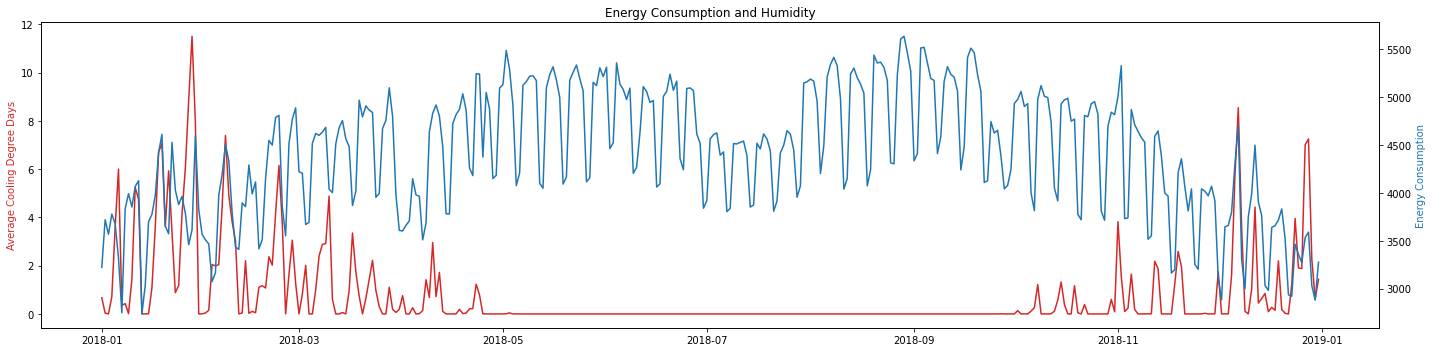

In [ ]:
# # Energy consumption vs CDD
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(df_daily.Date, df_daily.AvgCDD, color = 'tab:red')
ax1.set_ylabel('Average Cooling Degree Days', color = 'tab:red')
ax2 = ax1.twinx()
ax2.plot(df_daily.Date,df_daily.TotalConsumption,color = 'tab:blue')
ax2.set_ylabel('Energy Consumption',color = 'tab:blue')

plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

**Correlation between Weather Variables and Energy Consumption**


Energy has strong positive correlation with HDD, humidity and high negative correlation with temperature and CDD.

In [ ]:
cor_matrix = df_daily.corr()
cor_matrix

,TotalConsumption,AvgTemperature,AvgHumidity,AvgCDD,AvgHDD
TotalConsumption,1.000000,-0.404630,0.031100,-0.211699,0.428221
AvgTemperature,-0.404630,1.000000,-0.447214,0.759182,-0.955727
AvgHumidity,0.031100,-0.447214,1.000000,-0.397412,0.404324
AvgCDD,-0.211699,0.759182,-0.397412,1.000000,-0.537146
AvgHDD,0.428221,-0.955727,0.404324,-0.537146,1.000000


In [ ]:
cor_matrix = df.corr()
cor_matrix

,MeterKey,MeterReading,Day,Weekday,IsWeekend,IsHoliday,WeekOfMonth,WeekOfYear,Month,Quarter,Hour24,Hour12ShortString,Minute,HalfHour,ApparentTemperature,RelativeHumidity,CDD,HDD
MeterKey,1.000000,-0.290864,-0.000027,0.001165,0.000053,-0.000134,-0.000303,-0.000349,-0.000327,-0.000317,-0.000033,0.000031,0.000023,0.000049,-0.000004,-0.000024,0.006767,0.010694
MeterReading,-0.290864,1.000000,0.003303,-0.004681,-0.117398,-0.025171,0.001198,0.003215,0.003310,0.001044,0.075202,0.001253,-0.000617,-0.000793,-0.015365,-0.081784,-0.043373,0.088041
Day,-0.000027,0.003303,1.000000,0.003958,-0.008613,0.105418,0.951466,0.094439,0.011222,0.013138,-0.000442,-0.000018,-0.000054,-0.000027,-0.033788,0.066550,0.039606,0.068944
Weekday,0.001165,-0.004681,0.003958,1.000000,0.002954,-0.051163,-0.204847,-0.019021,-0.000341,-0.010780,-0.000326,-0.000242,-0.000013,-0.000019,0.025692,0.007859,0.101870,0.010082
IsWeekend,0.000053,-0.117398,-0.008613,0.002954,1.000000,-0.160260,-0.001404,0.013501,0.014349,0.006448,0.000241,0.000392,-0.000045,-0.000045,-0.027146,0.054097,-0.002351,0.044309
IsHoliday,-0.000134,-0.025171,0.105418,-0.051163,-0.160260,1.000000,0.147202,0.138188,0.128815,0.098531,0.000073,0.000115,0.000089,0.000075,0.094444,0.025103,0.066462,-0.112451
WeekOfMonth,-0.000303,0.001198,0.951466,-0.204847,-0.001404,0.147202,1.000000,0.176430,0.093257,0.048115,-0.000394,-0.000062,-0.000058,-0.000027,-0.029638,0.065956,0.025087,0.056568
WeekOfYear,-0.000349,0.003215,0.094439,-0.019021,0.013501,0.138188,0.176430,1.000000,0.996325,0.968240,0.000081,0.000144,-0.000096,-0.000066,-0.229188,0.064353,-0.236595,0.236748
Month,-0.000327,0.003310,0.011222,-0.000341,0.014349,0.128815,0.093257,0.996325,1.000000,0.971330,0.000113,0.000143,-0.000092,-0.000065,-0.229164,0.059926,-0.241391,0.234553
Quarter,-0.000317,0.001044,0.013138,-0.010780,0.006448,0.098531,0.048115,0.968240,0.971330,1.000000,0.000157,0.000254,-0.000086,-0.000064,-0.224520,0.049703,-0.237871,0.228159
